In [1]:
## Clone Deep Learning Utils Repo
!git clone https://github.com/shivam13juna/eva8_utils.git

fatal: destination path 'eva8_utils' already exists and is not an empty directory.


In [2]:
import pyrootutils
import sys

root = pyrootutils.setup_root(
    search_from=sys.path[0],
    pythonpath=True,
    cwd=True,
)

import torch
from core_utils import main
from core_utils.utils import data_handling, train, test, gradcam, helpers, augmentation
from core_utils.models import resnet
from pprint import pprint


import timm
import urllib
import torch
import os
import numpy as np

import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image

from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt

## Import Config

In [3]:
config_file_path = "core_utils/config/config.yaml"

config = helpers.load_config_variables(config_file_path)

 Loading config ..
 Config succesfully loaded 


## Perform GPU Check; Create "Device"

In [4]:
device, cuda = helpers.gpu_check(seed_value = 1)
pprint(device)

CUDA is available
device(type='cuda')


## Download Dataset, Create Data Loaders

In [5]:
mean, std = data_handling.return_dataset_statistics()
trainloader, testloader = main.create_dataloaders(mean, std, cuda, config, augment_func = "albumentation_augmentation")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Model Summary

In [6]:
from torchsummary import summary
model = resnet.ResNet18("layer").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Trigger Training

In [7]:
train_acc, train_losses, test_acc, test_losses, lrs = main.start_training(model, device, trainloader, testloader, config, optimizer_name = "Adam", scheduler_name = "ReduceLROnPlateau", criterion_name = "CrossEntropyLoss", lambda_l1 = 0, epochs = 20)

EPOCH: 1


Loss=2.1103317737579346 Batch_id=248 LR=0.01000 Accuracy=14.74:  64%|██████▎   | 249/391 [00:21<00:12, 10.98it/s]

## Plot Metrics

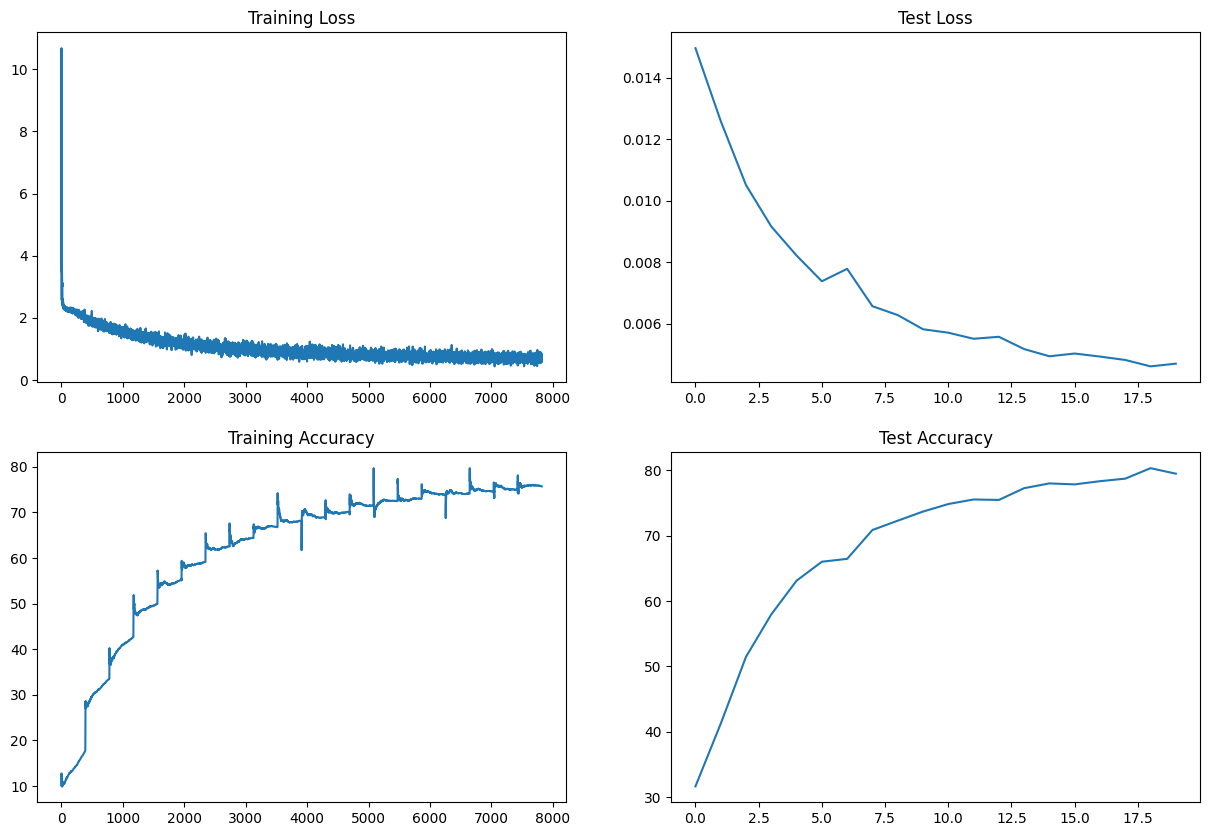

In [ ]:
helpers.plot_metrics(train_acc, train_losses, test_acc, test_losses)

## Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 2049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


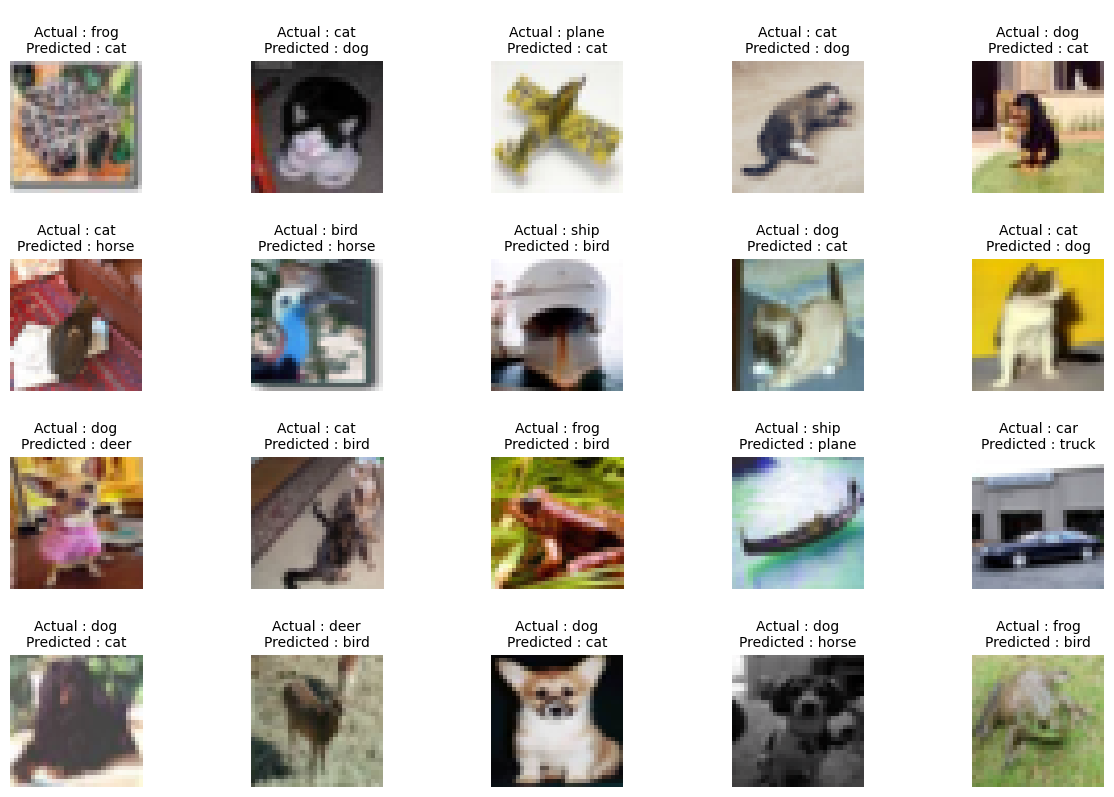

In [ ]:
misclassified_images = helpers.wrong_predictions(model, testloader, device)
helpers.plot_misclassified(misclassified_images, mean, std, 20)

## Gradcam

In [ ]:
# cifar 10 labels in a dictionary

cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


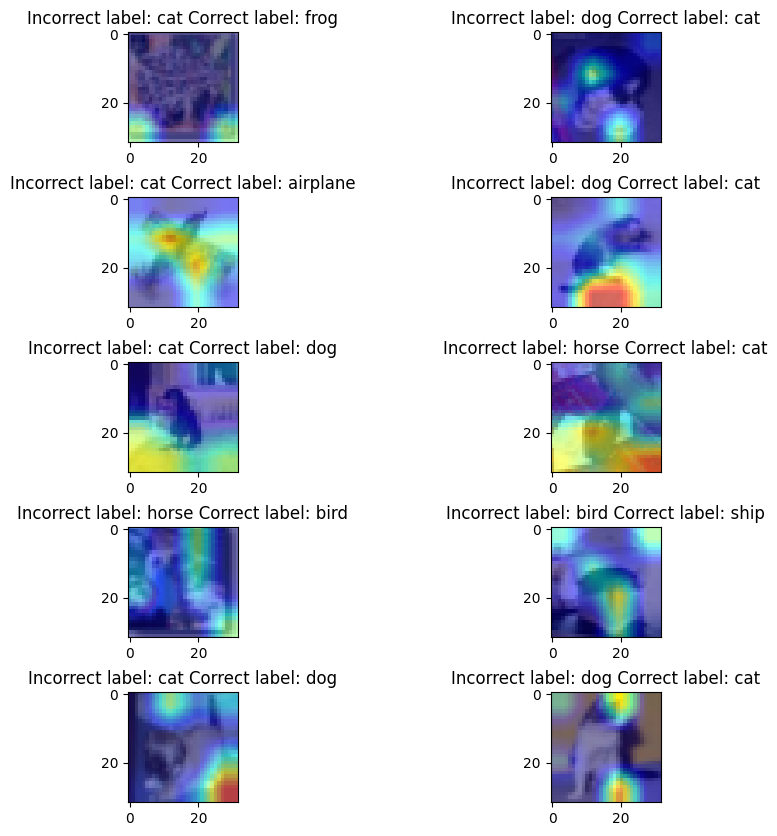

In [ ]:
from core_utils.utils import gradcam

gradcam.plot_gradcam_images(model, [model.layer4[-1]], misclassified_images[:10], list(range(10)), cifar10_labels)
    